In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Loading Data**

In [12]:
df = pd.read_csv(r'CarPrice_Assignment.csv')
print (df)


     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

# uploaded = files.upload('df')

In [13]:
data = pd.read_csv("CarPrice_Assignment.csv")

**Checking for Null in Dataset**

In [14]:
data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

# **Removing and seprating labels**

In [15]:
del data['car_ID']
labels = data.pop('price')
labels.astype('int16')
data.loc[3,'CarName'] = 'audi 100ls'

# **Checking objects datatypes in dataframe**

In [16]:
data_with_object_dtype = data.dtypes[data.dtypes == 'object']
data_with_object_dtype = list(data_with_object_dtype.keys())
data_with_object_dtype

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

## **One Hot Encode and vertorizing**

In [17]:
New_data = pd.get_dummies(data, columns=data_with_object_dtype)

In [18]:
New_data.iloc[:,1:14] -= (New_data.iloc[:,1:14]).mean()
New_data.iloc[:,1:14] /= (New_data.iloc[:,1:14]).std()
New_data.iloc[:,1:14]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725
1,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725
2,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,0.602571,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938
3,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.430023,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087
4,0.106848,0.206750,0.229440,0.235366,0.515545,0.218350,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.717669,1.195622,1.394830,0.726460,0.761377,0.338419,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.339264,-0.399512
201,1.717669,1.195622,1.348215,0.726460,0.947672,0.338419,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.950684,-0.835151
202,1.717669,1.195622,1.394830,0.726460,0.876611,1.106861,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.103540,-1.125577
203,1.717669,1.195622,1.394830,0.726460,1.270327,0.434474,-1.180593,0.461055,3.236992,0.047616,-0.681618,0.119302,-0.544725


In [19]:
data_len = len(New_data)
train_data = New_data.iloc[:data_len*70//100]
test_data = New_data.iloc[data_len*70//100:]

labels_len = len(labels)
train_labels = labels.iloc[:labels_len*70//100]
test_labels = labels.iloc[labels_len*70//100:]

In [20]:
New_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,-1.291108e-15,3.674026e-15,1.080978e-15,-5.719003e-16,9.531671e-17,3.466062e-17,2.235610e-15,2.062307e-15,-3.639365e-16,...,0.004878,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.069843,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,-2.018771e+00,-2.670706e+00,-2.614113e+00,-2.424729e+00,-2.050329e+00,-1.582686e+00,-2.915911e+00,-3.780057e+00,-7.911643e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.068655e-01,-6.281176e-01,-8.427194e-01,-7.058983e-01,-7.885183e-01,-7.181888e-01,-6.636894e-01,-4.636990e-01,-3.883487e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-2.917055e-01,-6.883752e-02,-1.901008e-01,1.535169e-01,-2.718864e-01,-1.658710e-01,-7.294280e-02,1.102860e-01,-2.876448e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,6.050399e-01,7.336078e-01,4.625179e-01,7.264604e-01,7.287278e-01,3.384191e-01,9.239421e-01,4.929427e-01,-1.869408e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,3.677223e+00,2.759985e+00,2.979761e+00,2.486215e+00,2.900886e+00,4.780975e+00,2.253122e+00,2.916435e+00,3.236992e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers
def Train_Me_with(activation_function="relu"):
  network = models.Sequential()
  network.add(layers.Dense(24, activation=activation_function,input_shape=(train_data.shape[1],)))
  network.add(layers.Dense(18, activation=activation_function))
  network.add(layers.Dense(12, activation=activation_function))
  network.add(layers.Dense(1))
  network.compile(
      optimizer="rmsprop",
      loss="mse",
      metrics=['mae']
  )
  return network

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# **MAE without K fold and with tanh**

In [22]:
Model_Results1 = Train_Me_with(activation_function="tanh").fit(
      train_data,train_labels,batch_size=32,epochs=500,validation_data=(test_data,test_labels)
  )

Epoch 1/500
5/5 [==============================] - 1s 86ms/step - loss: 285139850.6667 - mae: 14289.7472 - val_loss: 146557456.0000 - val_mae: 11350.9277
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 284321680.0000 - mae: 14224.9305 - val_loss: 146547376.0000 - val_mae: 11350.5205
Epoch 3/500
5/5 [==============================] - 0s 11ms/step - loss: 255900245.3333 - mae: 13567.1318 - val_loss: 146537840.0000 - val_mae: 11350.1074
Epoch 4/500
5/5 [==============================] - 0s 12ms/step - loss: 257984848.0000 - mae: 13687.5780 - val_loss: 146528224.0000 - val_mae: 11349.6875
Epoch 5/500
5/5 [==============================] - ETA: 0s - loss: 268984000.0000 - mae: 14113.996 - 0s 12ms/step - loss: 286093226.6667 - mae: 14295.1867 - val_loss: 146519072.0000 - val_mae: 11349.2695
Epoch 6/500
5/5 [==============================] - 0s 12ms/step - loss: 309191840.0000 - mae: 14878.1707 - val_loss: 146510128.0000 - val_mae: 11348.8506
Epoch 7/500
5/5 [=========

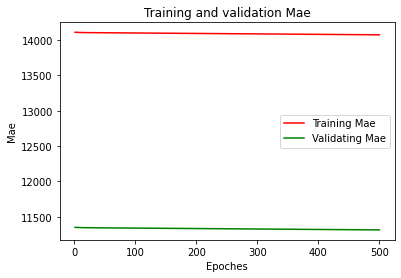

In [23]:
history_dict = Model_Results1.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()

In [24]:
history_dict = Model_Results1.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
mini = np.min(val_acc_values)
avrg = (maxi+mini)/2
print(f"FOR MODEL1 Average Validation Absolute Error = {avrg}")

FOR MODEL1 Average Validation Absolute Error = 11332.85791015625


# **MAE without K fold and with selu**

In [25]:
Model_Results2 = Train_Me_with(activation_function="selu").fit(
      train_data,train_labels,batch_size=20,epochs=500,validation_data=(test_data,test_labels)
  )

Epoch 1/500
8/8 [==============================] - 1s 42ms/step - loss: 293750218.6667 - mae: 14481.9036 - val_loss: 146520528.0000 - val_mae: 11349.4893
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 306967548.4444 - mae: 14927.2333 - val_loss: 146488320.0000 - val_mae: 11348.1348
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 289134897.7778 - mae: 14163.1324 - val_loss: 146453072.0000 - val_mae: 11346.6445
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 249401472.0000 - mae: 13537.0461 - val_loss: 146413168.0000 - val_mae: 11344.9678
Epoch 5/500
8/8 [==============================] - 0s 9ms/step - loss: 273247575.1111 - mae: 13842.4513 - val_loss: 146374128.0000 - val_mae: 11343.2549
Epoch 6/500
8/8 [==============================] - 0s 9ms/step - loss: 297118222.2222 - mae: 14504.3863 - val_loss: 146325584.0000 - val_mae: 11341.1826
Epoch 7/500
8/8 [==============================] - 0s 8ms/step - loss: 267703045.

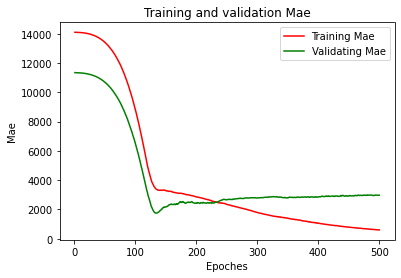

In [26]:
history_dict = Model_Results2.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()

In [27]:
history_dict = Model_Results2.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
mini = np.min(val_acc_values)
avrg = (maxi+mini)/2
print(f"FOR MODEL1 Average Validation Absolute Error = {avrg}")

FOR MODEL1 Average Validation Absolute Error = 6548.667907714844


# **MAE without K fold and with gelu**

In [28]:
Model_Results3 = Train_Me_with(activation_function="gelu").fit(
      train_data,train_labels,batch_size=20,epochs=500,validation_data=(test_data,test_labels)
  )

Epoch 1/500
8/8 [==============================] - 2s 49ms/step - loss: 252649635.5556 - mae: 13451.0372 - val_loss: 146558752.0000 - val_mae: 11350.9365
Epoch 2/500
8/8 [==============================] - 0s 9ms/step - loss: 319874030.2222 - mae: 14970.3573 - val_loss: 146542672.0000 - val_mae: 11350.3076
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 272682375.1111 - mae: 13936.3865 - val_loss: 146522864.0000 - val_mae: 11349.5137
Epoch 4/500
8/8 [==============================] - 0s 8ms/step - loss: 295604216.8889 - mae: 14630.7389 - val_loss: 146493312.0000 - val_mae: 11348.3486
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 293820007.1111 - mae: 14462.4376 - val_loss: 146455152.0000 - val_mae: 11346.8428
Epoch 6/500
8/8 [==============================] - 0s 8ms/step - loss: 292237431.1111 - mae: 14484.5528 - val_loss: 146403424.0000 - val_mae: 11344.8223
Epoch 7/500
8/8 [==============================] - 0s 9ms/step - loss: 255370048.

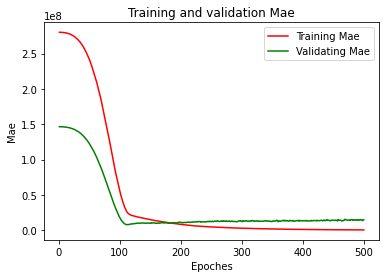

In [29]:
history_dict = Model_Results3.history
mae_values = history_dict['loss']
val_mae_values = history_dict['val_loss']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()

In [30]:
history_dict = Model_Results3.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
mini = np.min(val_acc_values)
avrg = (maxi+mini)/2
print(f"FOR MODEL1 Average Validation Absolute Error = {avrg}")

FOR MODEL1 Average Validation Absolute Error = 6763.98828125


# **MAE without K fold and with relu**

In [31]:
Model_Results4 = Train_Me_with(activation_function="relu").fit(
      train_data,train_labels,batch_size=20,epochs=500,validation_data=(test_data,test_labels)
  )

Epoch 1/500
8/8 [==============================] - 2s 41ms/step - loss: 251517440.0000 - mae: 13441.5719 - val_loss: 146570576.0000 - val_mae: 11351.4297
Epoch 2/500
8/8 [==============================] - 0s 8ms/step - loss: 275955914.6667 - mae: 13994.9842 - val_loss: 146567248.0000 - val_mae: 11351.2871
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 318157589.3333 - mae: 14939.1542 - val_loss: 146562448.0000 - val_mae: 11351.0986
Epoch 4/500
8/8 [==============================] - 0s 9ms/step - loss: 340698026.6667 - mae: 15492.0270 - val_loss: 146555952.0000 - val_mae: 11350.8457
Epoch 5/500
8/8 [==============================] - 0s 9ms/step - loss: 260865171.5556 - mae: 13626.4457 - val_loss: 146547216.0000 - val_mae: 11350.5059
Epoch 6/500
8/8 [==============================] - 0s 9ms/step - loss: 299553752.8889 - mae: 14574.7633 - val_loss: 146538608.0000 - val_mae: 11350.1475
Epoch 7/500
8/8 [==============================] - 0s 10ms/step - loss: 310936824

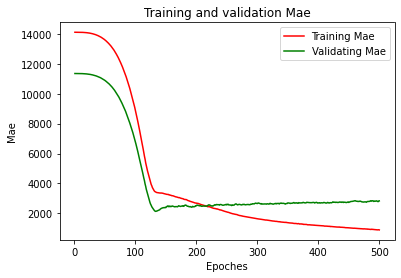

In [32]:
history_dict = Model_Results4.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()

In [33]:
history_dict = Model_Results4.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
mini = np.min(val_acc_values)
avrg = (maxi+mini)/2
print(f"FOR MODEL1 Average Validation Absolute Error = {avrg}")

FOR MODEL1 Average Validation Absolute Error = 6742.35498046875


# **MAE with K fold and with relu**

In [34]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = Train_Me_with('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# **MAE with K fold and with gelu**

In [35]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_gelu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = Train_Me_with('gelu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_gelu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# **MAE with K fold and with selu**

In [36]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_selu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = Train_Me_with('selu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_selu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# **MAE with K fold and with tanh**

In [37]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = Train_Me_with('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# **Averages**

In [38]:
print(f"Using activation function relu {np.average(all_scores_relu)}")
print(f"Using activation function tanh {np.average(all_scores_tanh)}")
print(f"Using activation function gelu {np.average(all_scores_gelu)}")
print(f"Using activation function selu {np.average(all_scores_selu)}")

Using activation function relu 2643.7806396484375
Using activation function tanh 14131.40380859375
Using activation function gelu 2654.5928344726562
Using activation function selu 2788.0716552734375


# **So Outcome of after all struggle**

Relu functions give better results amoung all other //\\\ Now paying with epochs

In [39]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 200
all_scores_K_relu = []
model = Train_Me_with('relu')
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  Model_Results = model.fit(partial_train_data, partial_train_targets,epochs = num_epochs, batch_size=1,verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_K_relu.append(val_mae)
  history_dict = Model_Results.history
  mae_values = history_dict['mae']
print(f"On Eveluation Average using RELU and having {num_epochs} epoches is {np.average(all_scores_K_relu)}")

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
On Eveluation Average using RELU and having 200 epoches is 1374.2182159423828


# **Prediction obtained**

In [40]:
Predicted_val = model.predict(test_data)

In [41]:
y_pred = Predicted_val.flatten()
y_true = test_labels


(500.0, 30000.0)

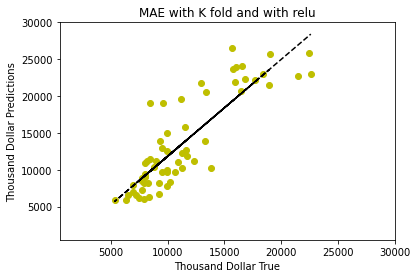

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
coef = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.figure()
plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.title('MAE with K fold and with relu')
plt.xlabel('Thousand Dollar True' )
plt.ylabel('Thousand Dollar Predictions' )
plt.xlim(500, 30000)
plt.ylim(500, 30000)

In [44]:
print(f"when  Eveluation Average get using RELU is {np.average(all_scores_K_relu)}")

when  Eveluation Average get using RELU is 1374.2182159423828
